In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

df_memory = pd.read_csv("../DATA/memory_cpu/processed/memory_usage(w_o-cache).csv")
df_cpu = pd.read_csv("../DATA/memory_cpu/processed/cpu_usage.csv")
print(df_memory.shape)
print(df_cpu.shape)


(258, 94)
(258, 94)


In [2]:
# Drop job-submitter values as they are temporal
for col in df_memory.columns:
    if("job-submitter" in col):
        df_memory.drop(col, axis="columns", inplace=True)

for col in df_cpu.columns:
    if("job-submitter" in col):
        df_cpu.drop(col, axis="columns", inplace=True)

# drop kafka and zookeeper
df_memory.drop("kafka-broker-7895669795-rn8mr", axis="columns", inplace=True)
df_memory.drop("zookeeper-ensemble-68d5f754b-bmf2f", axis="columns", inplace=True)
df_cpu.drop("kafka-broker-7895669795-rn8mr", axis="columns", inplace=True)
df_cpu.drop("zookeeper-ensemble-68d5f754b-bmf2f", axis="columns", inplace=True)


In [3]:
flinkcluster_names = [col for col in df_memory if("flinkjobcluster" in col)]
goflow_names = [col for col in df_memory if("goflow2" in col)]

df_memory_merge = pd.DataFrame()
cont = 0
while(len(flinkcluster_names)>0):
    col = flinkcluster_names[0]
    if("jobmanager" in col):
        temp = col.split("-")
        temp[-2] = "taskmanager"
        task = "-".join(temp)
        if(task in flinkcluster_names):
            df_memory_merge["-".join(temp[0:-2])] = df_memory[col]+df_memory[task]
            flinkcluster_names.remove(col)
            flinkcluster_names.remove(task)
        else:
            print("ERROR NO TASK")
    else:
        print("ERROR JOBMANAGER")

df_memory_merged = pd.concat([df_memory_merge, df_memory[goflow_names].copy()], axis="columns")
df_memory_merged.head(20)

,flinkjobcluster-consumer-cds-1,flinkjobcluster-consumer-cds-2,flinkjobcluster-consumer-cds-3,flinkjobcluster-consumer-cds-4,flinkjobcluster-consumer-cds-5,flinkjobcluster-consumer-cds-6,flinkjobcluster-consumer-cds-7,flinkjobcluster-netflow-aggregator-1,flinkjobcluster-netflow-aggregator-2,flinkjobcluster-netflow-aggregator-3,...,flinkjobcluster-netflow2bidi-5,flinkjobcluster-netflow2bidi-6,flinkjobcluster-netflow2bidi-7,goflow2-1-64b6c798f-dczzz,goflow2-2-8b749c4c9-4p4xg,goflow2-3-6fffccdb9-cjbfq,goflow2-4-d97c8679-9lpxb,goflow2-5-5b84cd87c7-l8k94,goflow2-6-849bbfbccf-bxhzn,goflow2-7-546d6d6fc-smdrp
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
flinkcluster_names = [col for col in df_cpu if("flinkjobcluster" in col)]
goflow_names = [col for col in df_cpu if("goflow2" in col)]

df_cpu_merge = pd.DataFrame()
cont = 0
while(len(flinkcluster_names)>0):
    col = flinkcluster_names[0]
    if("jobmanager" in col):
        temp = col.split("-")
        temp[-2] = "taskmanager"
        task = "-".join(temp)
        if(task in flinkcluster_names):
            df_cpu_merge["-".join(temp[0:-2])] = df_cpu[col]+df_cpu[task]
            flinkcluster_names.remove(col)
            flinkcluster_names.remove(task)
        else:
            print("ERROR NO TASK")
    else:
        print("ERROR JOBMANAGER")

        
df_cpu_merged = pd.concat([df_cpu_merge, df_cpu[goflow_names].copy()], axis="columns")
df_cpu_merged.head(20)

,flinkjobcluster-consumer-cds-1,flinkjobcluster-consumer-cds-2,flinkjobcluster-consumer-cds-3,flinkjobcluster-consumer-cds-4,flinkjobcluster-consumer-cds-5,flinkjobcluster-consumer-cds-6,flinkjobcluster-consumer-cds-7,flinkjobcluster-netflow-aggregator-1,flinkjobcluster-netflow-aggregator-2,flinkjobcluster-netflow-aggregator-3,...,flinkjobcluster-netflow2bidi-5,flinkjobcluster-netflow2bidi-6,flinkjobcluster-netflow2bidi-7,goflow2-1-64b6c798f-dczzz,goflow2-2-8b749c4c9-4p4xg,goflow2-3-6fffccdb9-cjbfq,goflow2-4-d97c8679-9lpxb,goflow2-5-5b84cd87c7-l8k94,goflow2-6-849bbfbccf-bxhzn,goflow2-7-546d6d6fc-smdrp
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_memory_merged['Sum'] = df_memory_merged.sum(axis=1)
df_cpu_merged['Sum'] = df_cpu_merged.sum(axis=1)

['9:35', '9:39', '9:43', '9:47', '9:51', '9:55', '10:00', '10:04', '10:08', '10:12']


C:\Users\a880239\AppData\Local\Temp\ipykernel_15648\1974333833.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(labels)


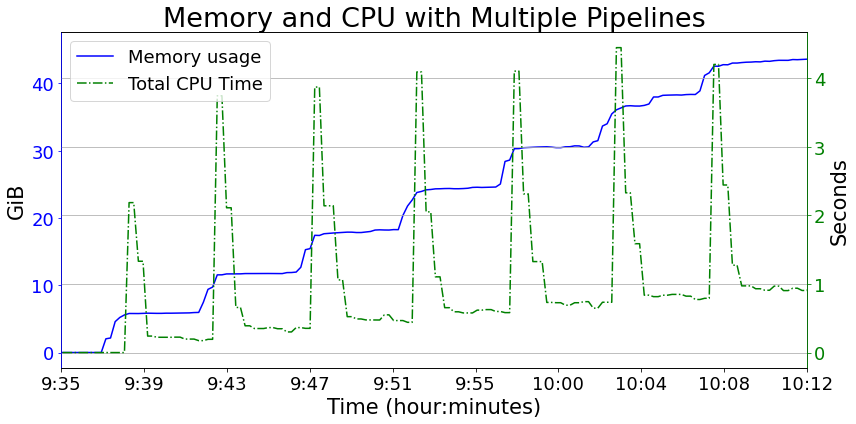

In [6]:

fig, ax = plt.subplots(figsize=(12, 6))

ax2 = ax.twinx()

ax.plot(df_memory["Time"], df_memory_merged["Sum"]/(1024*1024*1024), color="blue", label="Memory Usage")
ax2.plot(np.nan, label = 'Memory usage', color="blue")
ax2.plot(df_cpu["Time"], df_cpu_merged["Sum"], color="green", linestyle="dashdot", label="Total CPU Time")

ax.set_title("Memory and CPU with Multiple Pipelines", size=27)
ax.set_xlabel("Time (hour:minutes)", size=21)
ax.set_ylabel("GiB", size=21)
ax2.set_ylabel("Seconds", size=21)

# AXIS CONFIGURATION
ax.set_xlim(1656570000+4500, 1656570000+6750)
ax.tick_params(axis='both', which='major', labelsize=18)
ax.tick_params(axis='both', which='minor', labelsize=18)
ax2.tick_params(axis='both', which='major', labelsize=18)
ax2.tick_params(axis='both', which='minor', labelsize=18)

# set x labels to hours and minutes
labels = [str(datetime.fromtimestamp(i).hour) + ":" + str(datetime.fromtimestamp(i).minute).zfill(2)
          for i in ax.get_xticks()]
print(labels)
ax2.set_xticklabels(labels)

# set left and right yaxis color
ax.tick_params(axis="y", colors='blue', which='both')
ax2.spines['left'].set_color('blue')
ax2.tick_params(axis="y", colors='green', which='both')
ax2.spines['right'].set_color('green')

ax2.legend(loc="best", fontsize=18)
ax2.grid()
fig.tight_layout()
fig.savefig("memorycpu.pdf", format='pdf')
plt.show()
